In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
db_path = 'data.db'
db = sqlite3.connect(db_path)
table_name = 'test_table'

In [3]:
tasks = pd.read_sql_query(f'select * from "{table_name}"', db)
tasks['completion time'] = tasks['returned'] - tasks['start_submit']
tasks.head()

,run_id,monitor_tag,start_submit,end_submit,returned,workers,tasks_per_trial,trial,app_name,completion time
0,a7fafd98-65bc-4b19-86bb-3e4108bdc62f,no_monitor,1.711587e+09,1.711587e+09,1.711587e+09,1,10,1,noop,0.106464
1,475255c5-8430-457f-a804-f46a8a8bfadd,no_monitor,1.711587e+09,1.711587e+09,1.711587e+09,1,10,1,sleep10ms,0.207205
2,8fbcae54-27b5-44b5-bdbf-650626fe41e7,no_monitor,1.711587e+09,1.711587e+09,1.711587e+09,1,10,1,sleep100ms,1.107912
3,877d8b9f-8637-4407-9f8f-53499669a655,htex,1.711587e+09,1.711587e+09,1.711587e+09,1,10,1,noop,0.108672
4,eb520051-90a6-449a-8feb-735ee8c36bb1,htex,1.711587e+09,1.711587e+09,1.711587e+09,1,10,1,sleep10ms,0.209179


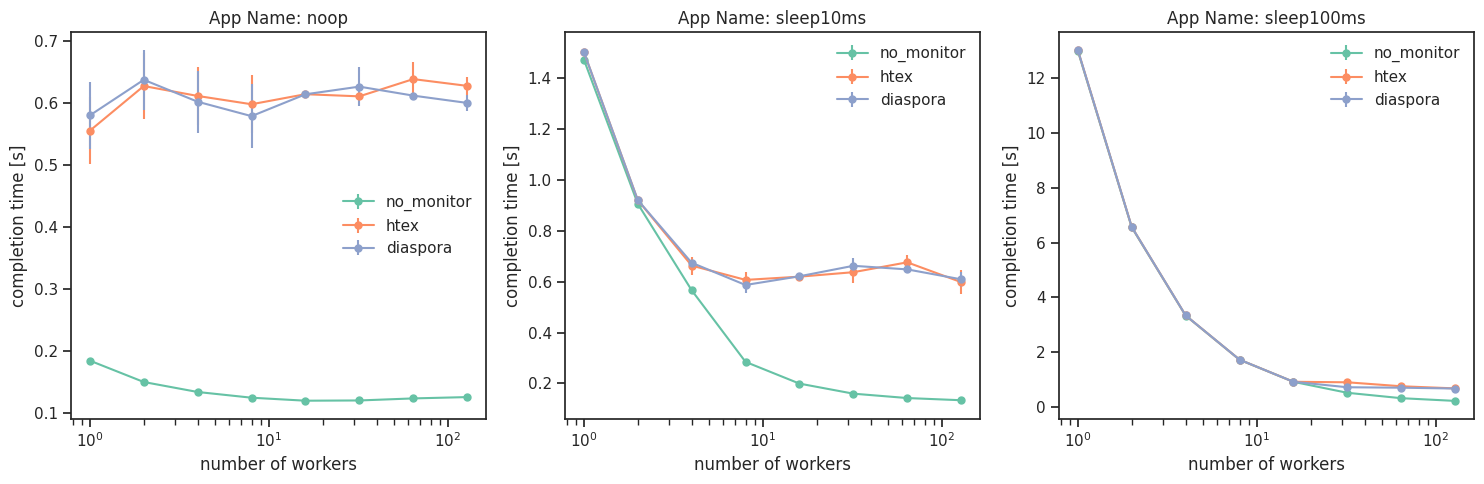

In [4]:
# strong scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')

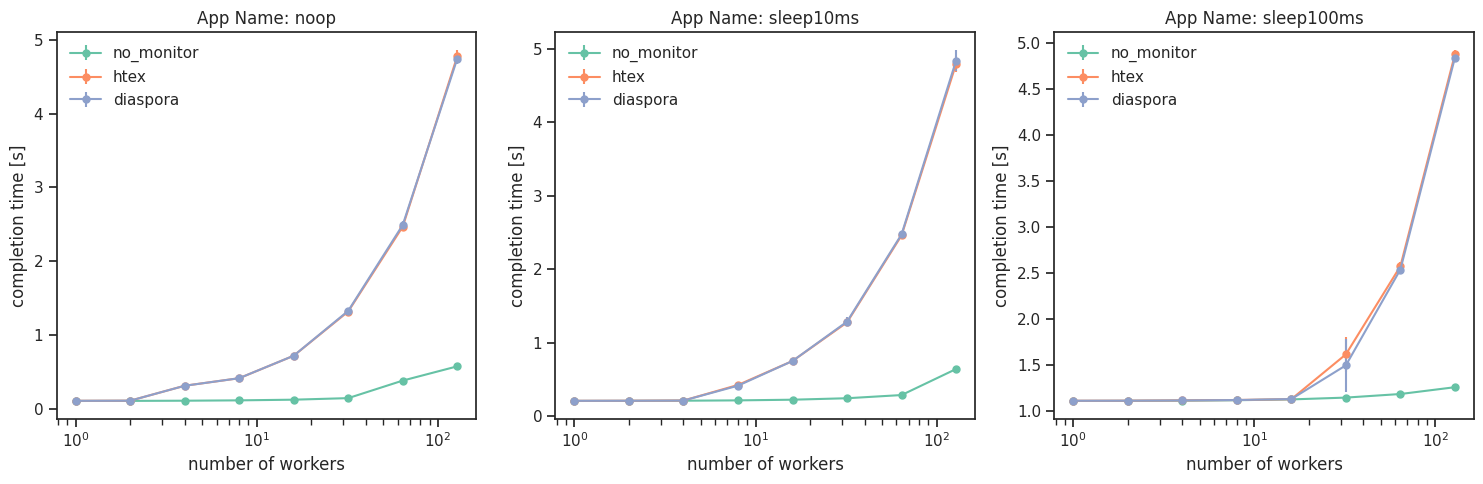

In [6]:
# weak scaling
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['completion time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'completion time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['completion time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('completion time [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')